In [1]:
## importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#  read the data from the csv file

data = pd.read_csv('bigmart_sales.csv')
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot: >

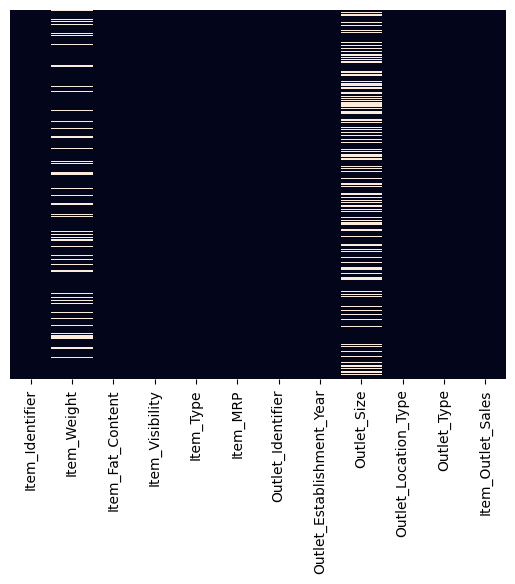

In [5]:
## Check out for missing values

sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

#### Filling missing values

In [6]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [8]:
## use mode imputation for the categorical variable
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
data['Outlet_Size'].mode()
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [10]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [11]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
## descriibe the object types dataset

data.describe(include=object)

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        8523                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        5203                 3350               5577

In [13]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
data.corr()

C:\Users\Olayinka Akerekan\AppData\Local\Temp\ipykernel_4176\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [15]:
# check the datatypes in the dataset

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()

We do label encoding to convert object types entity to integers. This way, it is easily more machine friendly. 


In [17]:
data['Item_Fat_Content'] = Label.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = Label.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = Label.fit_transform(data['Outlet_Identifier'])
data['Outlet_Location_Type'] = Label.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size'] = Label.fit_transform(data['Outlet_Size'])
data['Outlet_Type'] = Label.fit_transform(data['Outlet_Type'])

In [18]:
print(f'We have {data.shape[0]} rows and {data.shape[1]} columns of data')

We have 8523 rows and 12 columns of data


In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

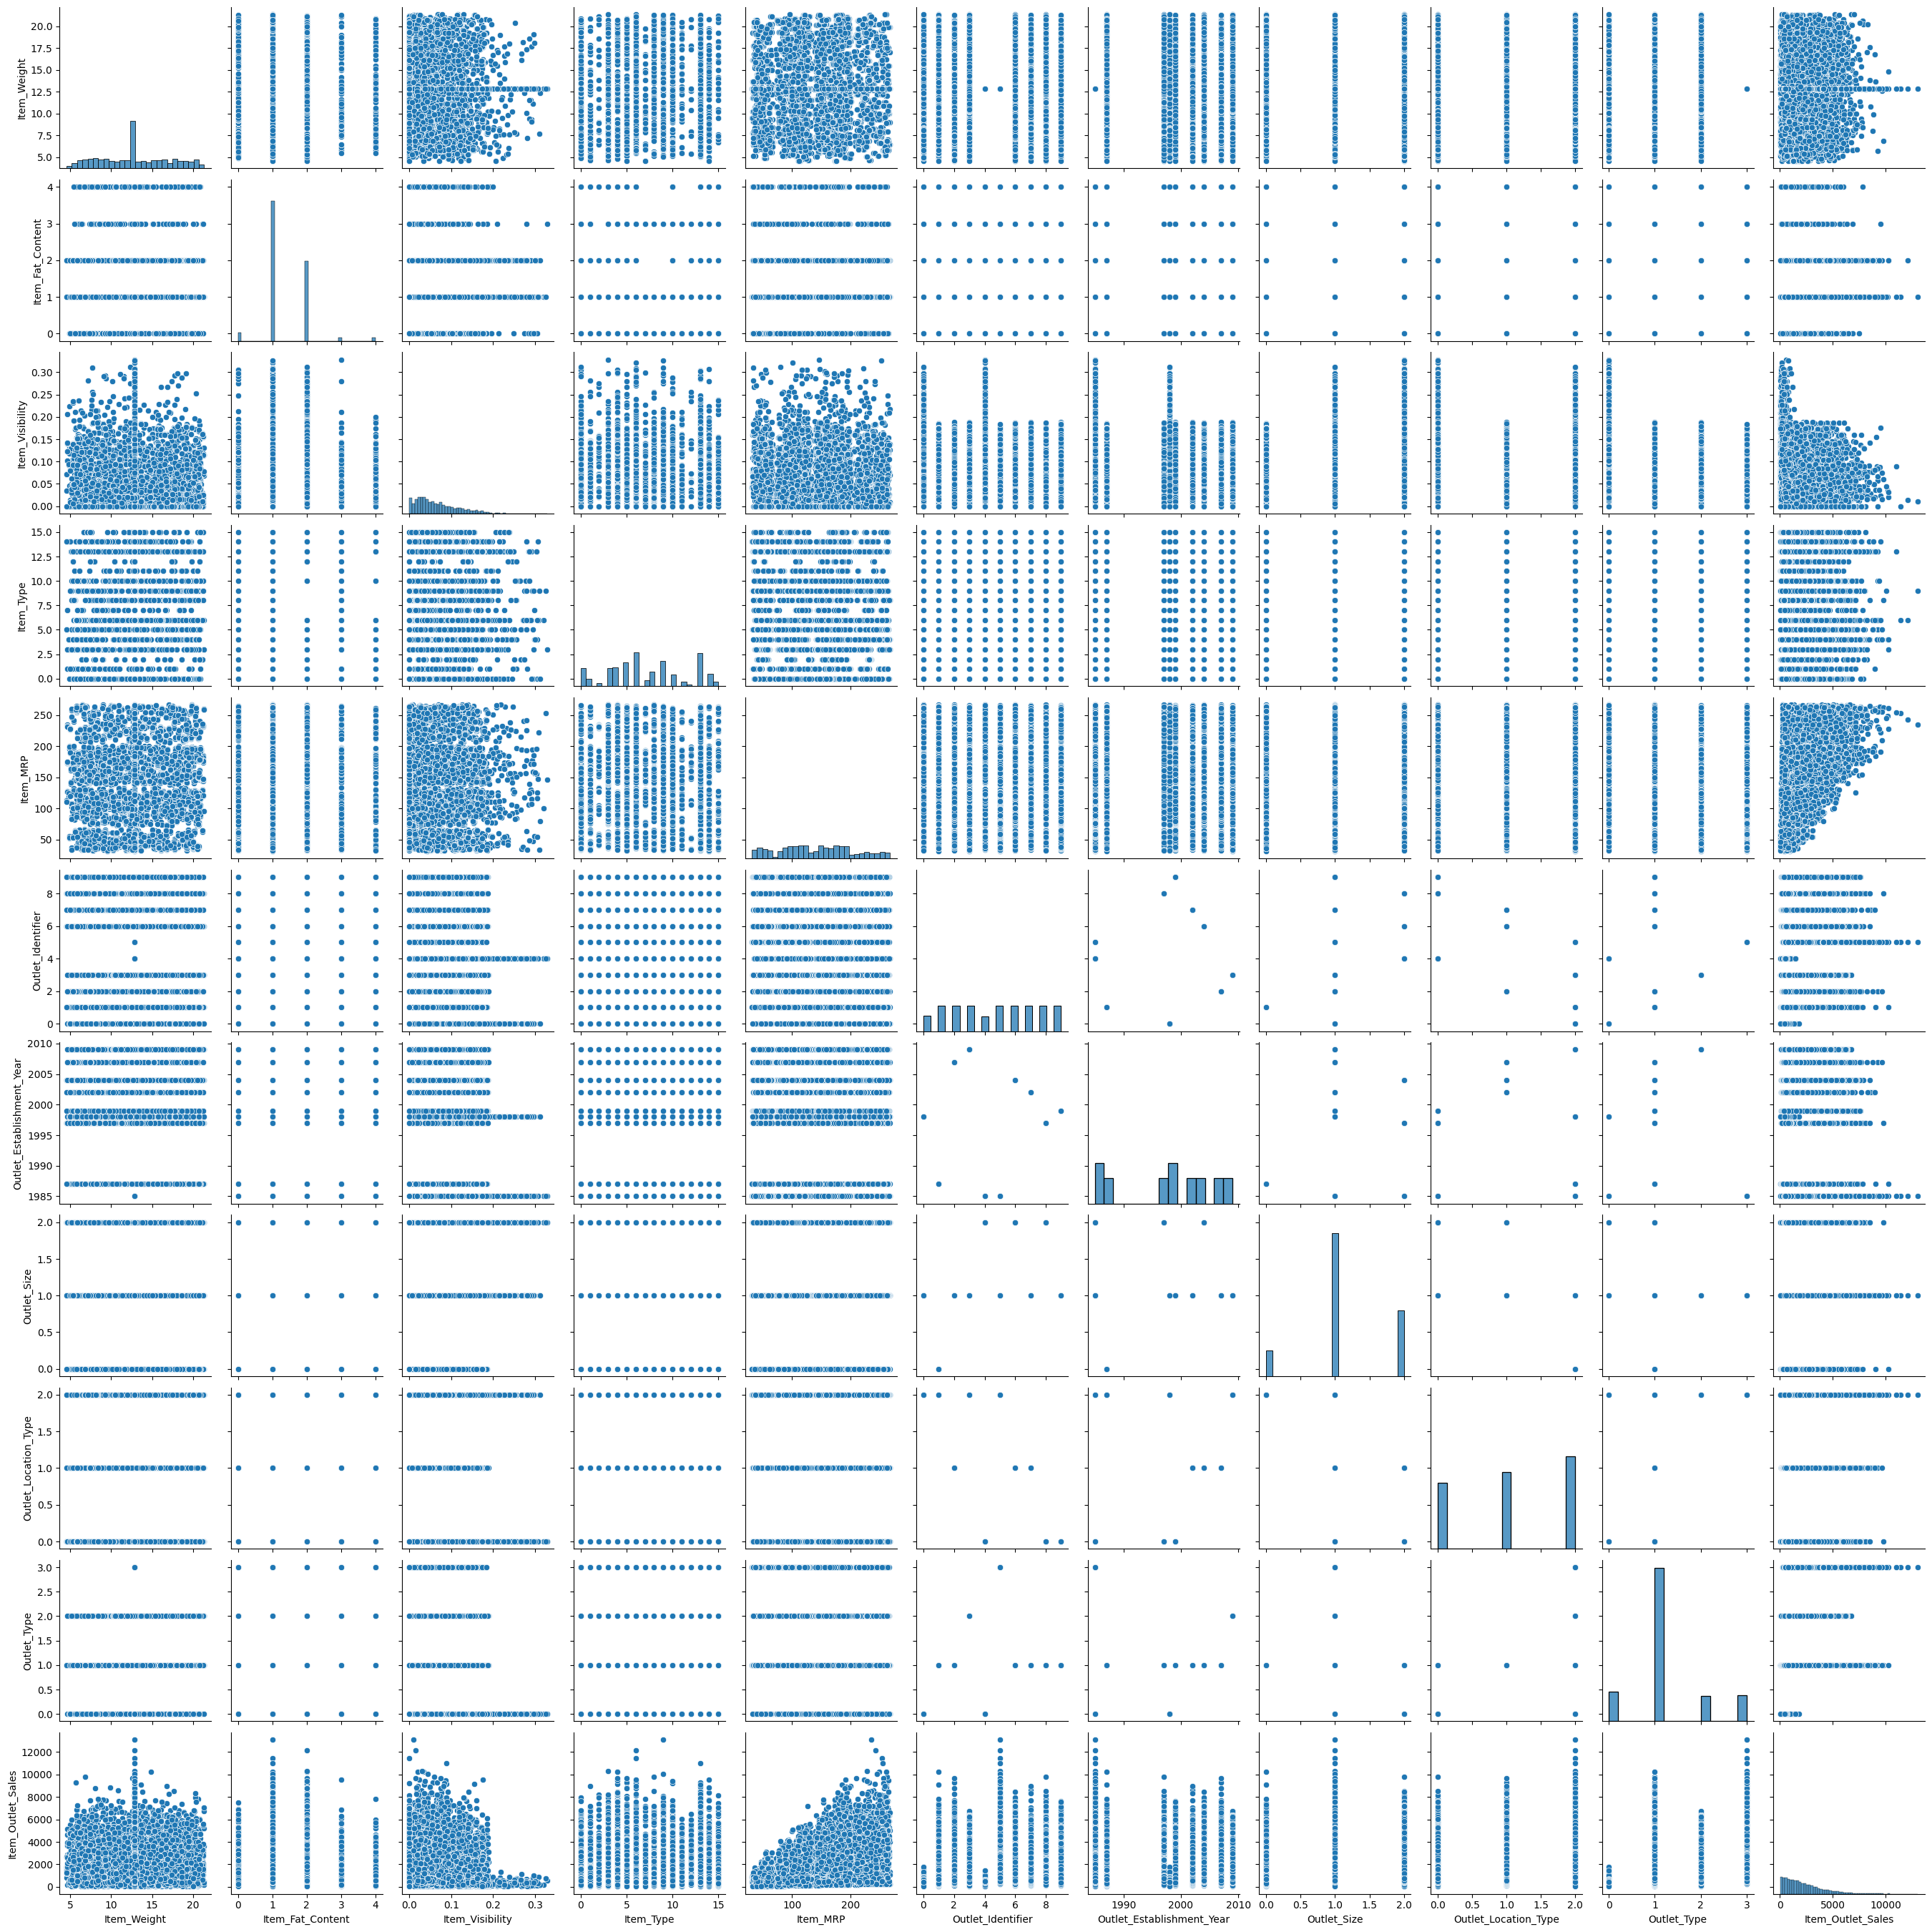

In [20]:
## plot a pairplot to get grisp of the datasets
sns.pairplot(data=data)

In [21]:
data.describe()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.369354         0.066132     7.226681   
std       4.226124          0.644810         0.051598     4.209990   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.310000          1.000000         0.026989     4.000000   
50%      12.857645          1.000000         0.053931     6.000000   
75%      16.000000          2.000000         0.094585    10.000000   
max      21.350000          4.000000         0.328391    15.000000   

          Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000        8523.000000                8523.000000  8523.000000   
mean    140.992782           4.722281                1997.831867     1.170832   
std      62.275067           2.837201                   8.371760     0.600327   
min      31.290000           0.000000                1985.000000     0.000000   
25%      93.826500           2.000000                1987.000000     1.000000   
50%     143.012800           5.000000                1999.000000     1.000000   
75%     185.643700           7.000000                2004.000000     2.000000   
max     266.888400           9.000000                2009.000000     2.000000   

       Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
count           8523.000000  8523.000000        8523.000000  
mean               1.112871     1.201220        2181.288914  
std                0.812757     0.796459        1706.499616  
min                0.000000     0.000000          33.290000  
25%                0.000000     1.000000         834.247400  
50%                1.000000     1.000000        1794.331000  
75%                2.000000     1.000000        3101.296400  
max                2.000000     3.000000       13086.964800

C:\Users\Olayinka Akerekan\AppData\Local\Temp\ipykernel_4176\403458542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

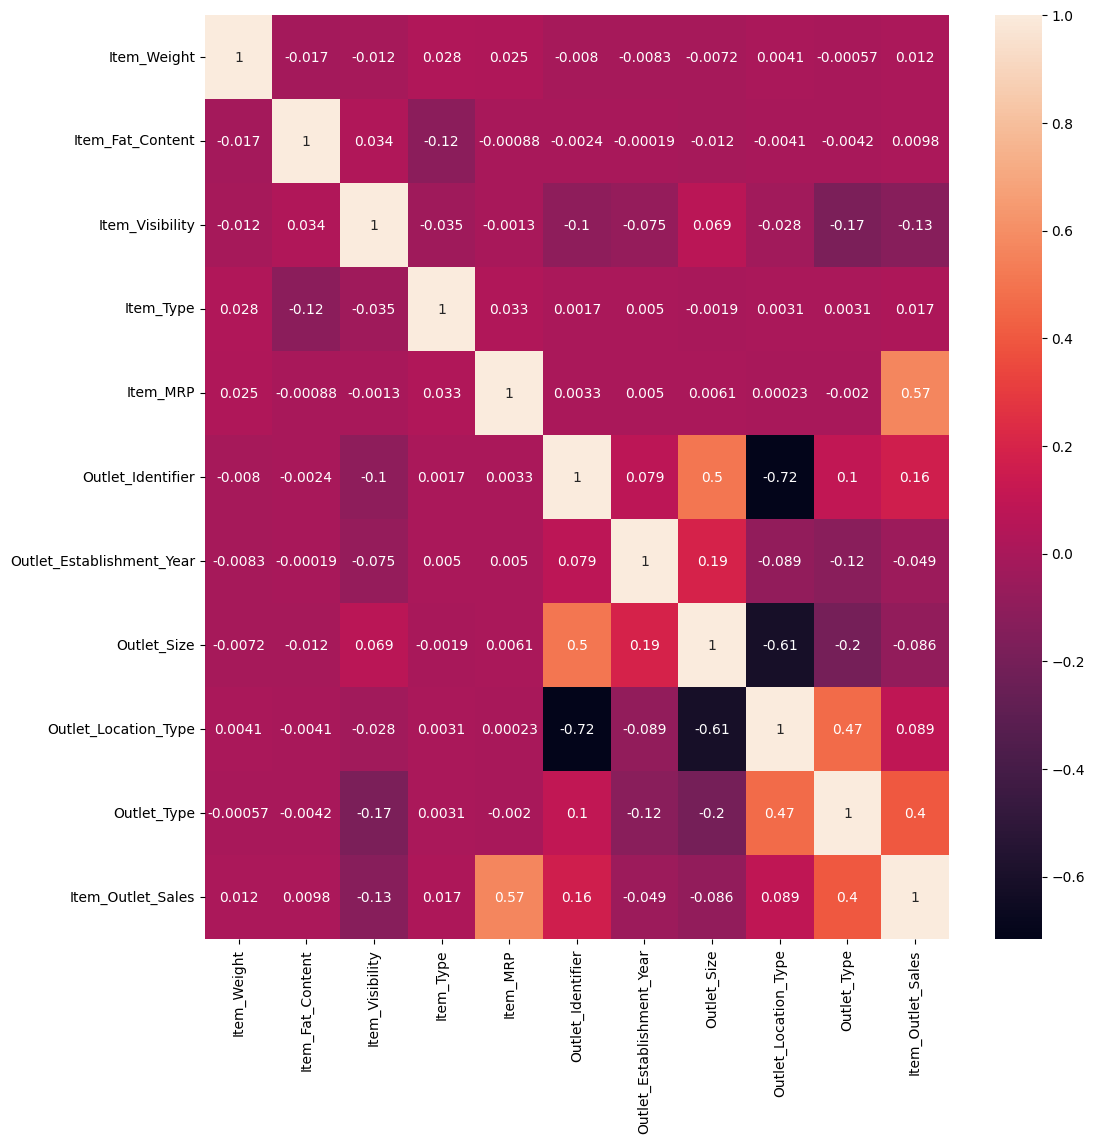

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

### Feature Selection



In [23]:
data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [24]:
data

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      Outlet_Type  Item_Outlet_Sales  
0               1          3735.1380  
1               2           443.4228  
2               1          2097.2700  
3               0           732.3800  
4               1           994.7052  
...           ...                ...  
8518            1          2778.3834  
8519            1           549.2850  
8520            1          1193.1136  
8521            2          1845.5976  
8522            1           765.6700  

[8523 rows x 10 columns]

### Exploratory Data Analysis with dtale

In [25]:
import dtale

In [26]:
dtale.show(data)

### EDA with Pandas_Profiling

In [27]:
from pandas_profiling import ProfileReport

2023-02-19 07:08:17,520 - INFO     - Pandas backend loaded 1.5.2
2023-02-19 07:08:17,542 - INFO     - Numpy backend loaded 1.21.5
2023-02-19 07:08:17,545 - INFO     - Pyspark backend NOT loaded
2023-02-19 07:08:17,546 - INFO     - Python backend loaded
C:\Users\Olayinka Akerekan\AppData\Local\Temp\ipykernel_4176\2274191625.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [28]:
profile = ProfileReport(data, title= 'Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA with klib

In [29]:
import klib

In [30]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(data) # returns a visualization of the number and frequency of categorical features

No columns with categorical data were detected.


In [31]:
klib.corr_mat(data) # returns a color-encoded correlation matrix

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

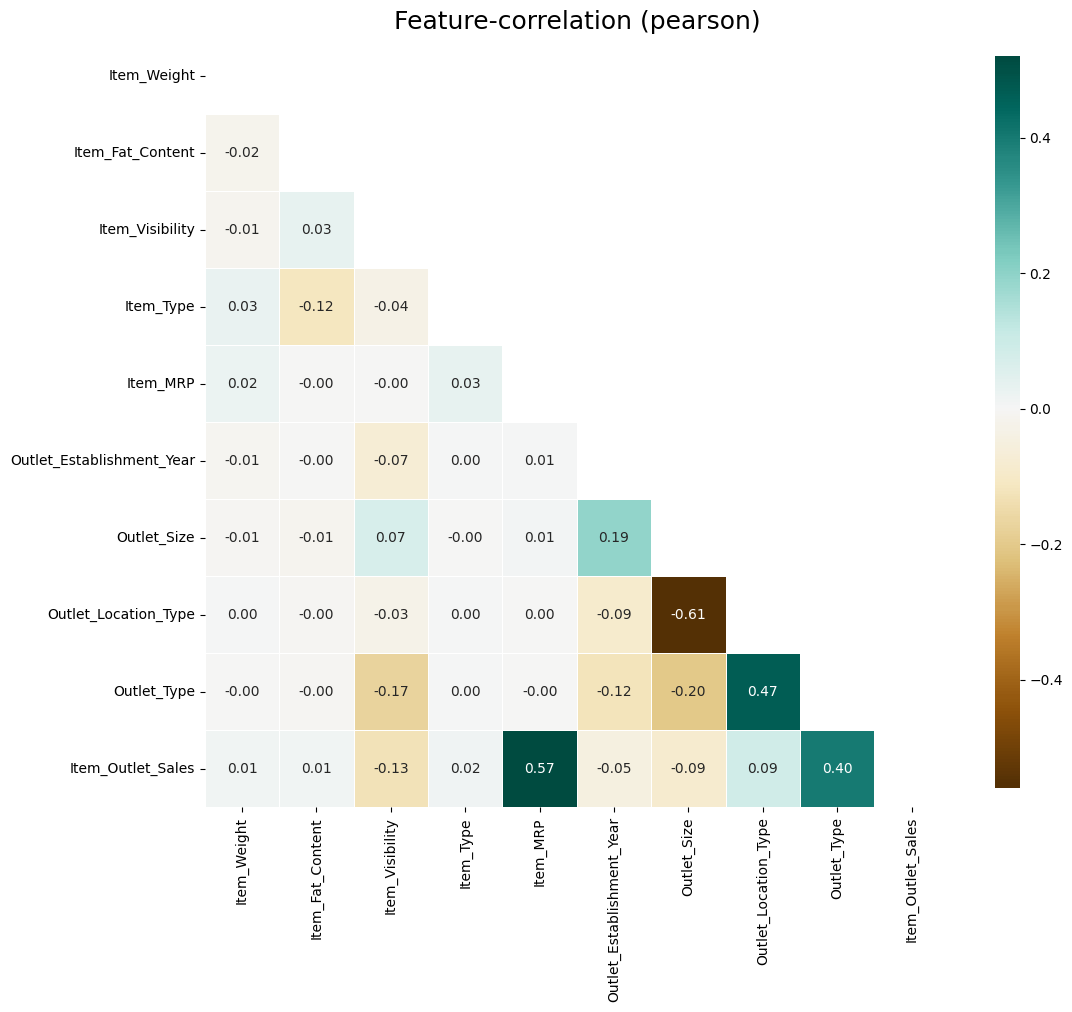

In [32]:
klib.corr_plot(data) # returns a color-encoded heatmap, ideal for correlations


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

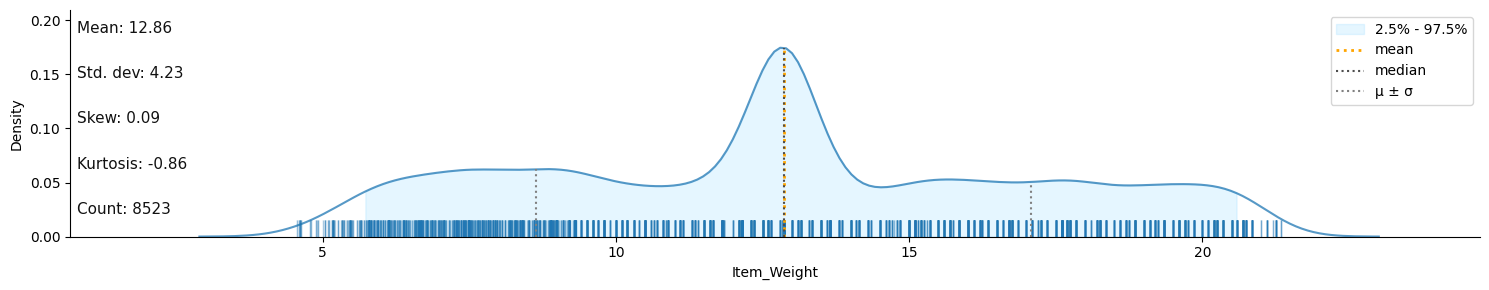

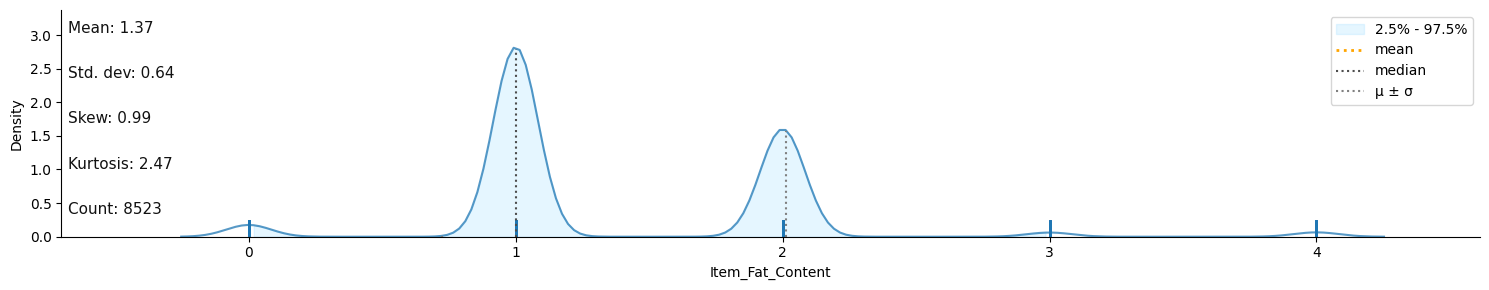

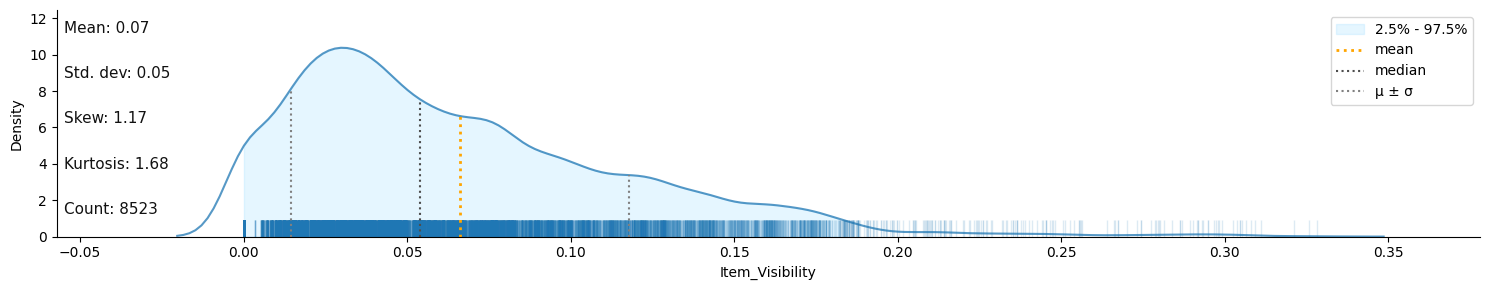

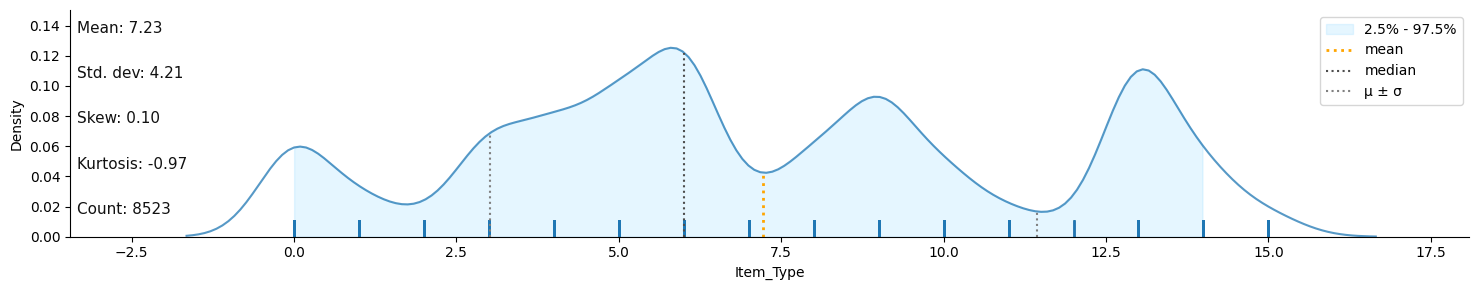

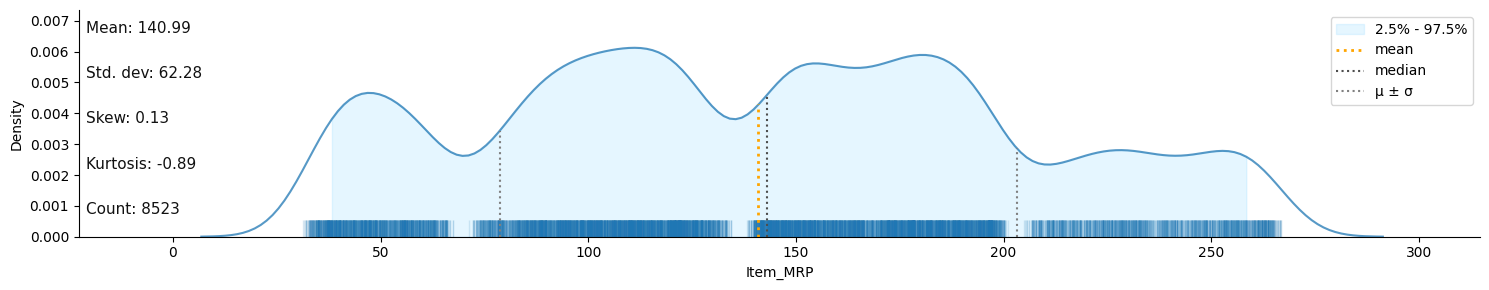

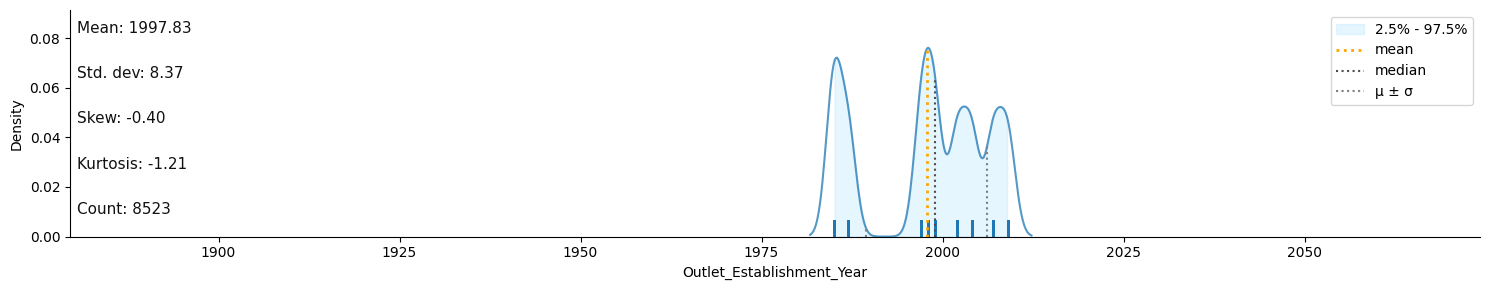

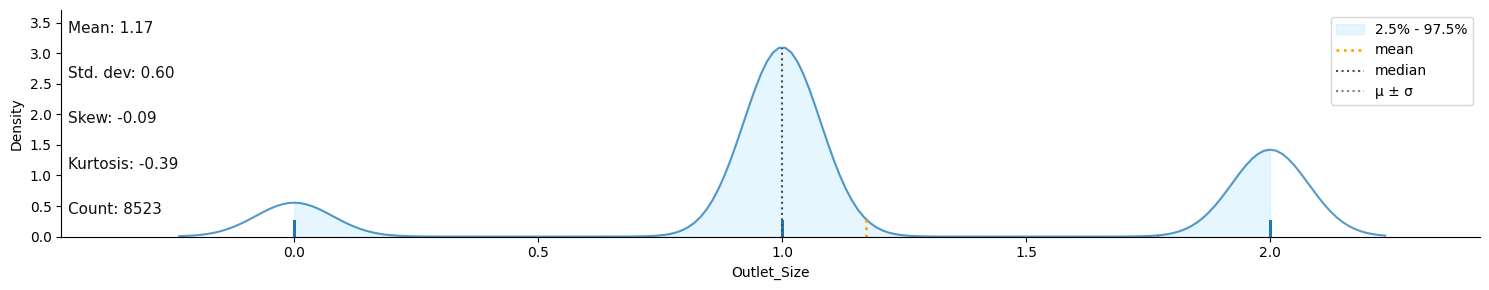

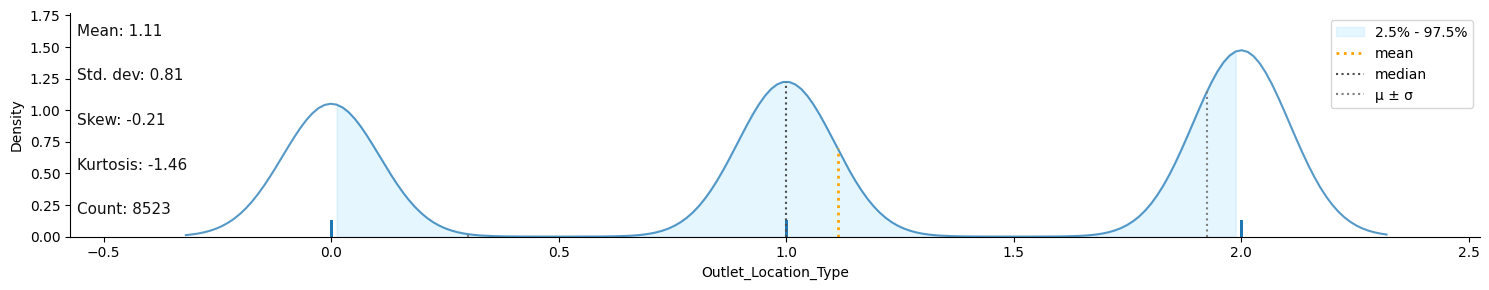

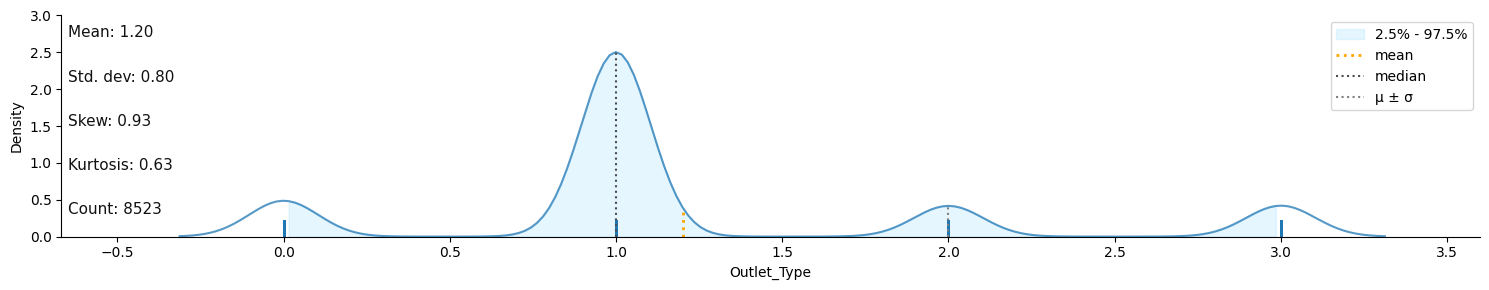

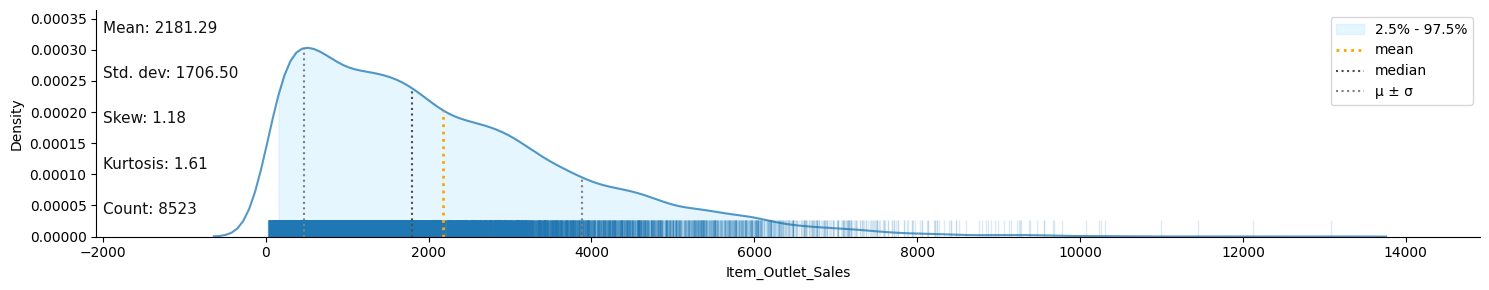

In [33]:
klib.dist_plot(data) # returns a distribution plot for every numeric feature


In [34]:
klib.missingval_plot(data) # returns a figure containing information about missing values


No missing values found in the dataset.


## Data Cleaning with Klib

In [35]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(data) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.18 MB (-36.73%)



item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0        9.300000                 1         0.016047          4  249.809204   
1        5.920000                 2         0.019278         14   48.269199   
2       17.500000                 1         0.016760         10  141.617996   
3       19.200001                 2         0.000000          6  182.095001   
4        8.930000                 1         0.000000          9   53.861401   
...           ...               ...              ...        ...         ...   
8518     6.865000                 1         0.056783         13  214.521805   
8519     8.380000                 2         0.046982          0  108.156998   
8520    10.600000                 1         0.035186          8   85.122398   
8521     7.210000                 2         0.145221         13  103.133202   
8522    14.800000                 1         0.044878         14   75.467003   

      outlet_establishment_year  outlet_size  outlet_location_type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      outlet_type  item_outlet_sales  
0               1        3735.137939  
1               2         443.422791  
2               1        2097.270020  
3               0         732.380005  
4               1         994.705200  
...           ...                ...  
8518            1        2778.383301  
8519            1         549.284973  
8520            1        1193.113647  
8521            2        1845.597656  
8522            1         765.669983  

[8523 rows x 10 columns]

### Train_Test_Split




In [36]:
X = data.drop('Item_Outlet_Sales', axis=1)
y= data['Item_Outlet_Sales']

In [37]:
!pip install -U scikit-learn



In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X=data.drop('Item_Outlet_Sales',axis=1)
Y=data['Item_Outlet_Sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [41]:
X.describe()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.369354         0.066132     7.226681   
std       4.226124          0.644810         0.051598     4.209990   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.310000          1.000000         0.026989     4.000000   
50%      12.857645          1.000000         0.053931     6.000000   
75%      16.000000          2.000000         0.094585    10.000000   
max      21.350000          4.000000         0.328391    15.000000   

          Item_MRP  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000                8523.000000  8523.000000   
mean    140.992782                1997.831867     1.170832   
std      62.275067                   8.371760     0.600327   
min      31.290000                1985.000000     0.000000   
25%      93.826500                1987.000000     1.000000   
50%     143.012800                1999.000000     1.000000   
75%     185.643700                2004.000000     2.000000   
max     266.888400                2009.000000     2.000000   

       Outlet_Location_Type  Outlet_Type  
count           8523.000000  8523.000000  
mean               1.112871     1.201220  
std                0.812757     0.796459  
min                0.000000     0.000000  
25%                0.000000     1.000000  
50%                1.000000     1.000000  
75%                2.000000     1.000000  
max                2.000000     3.000000

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
standardsc = StandardScaler()

In [44]:
X_train_std = standardsc.fit_transform(X_train)
X_train_std

array([[-0.80021083,  0.97369917, -0.60070308, ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 1.21131742, -0.57161762, -0.36215854, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.11665727,  0.97369917,  0.19493285, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 1.11665727, -0.57161762, -0.91693149, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.76744582,  2.51901595, -0.22818684, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.82084429, -2.1169344 , -0.95485942, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [45]:
X_test_std = standardsc.fit_transform(X_test)
X_test_std

array([[ 0.36383318, -0.57791931, -0.76476023, ..., -1.94535345,
         1.12203842, -0.22494293],
       [-1.14369073, -0.57791931,  0.09308179, ...,  1.37313343,
        -1.31500044, -0.22494293],
       [ 0.41116517,  0.9961261 , -0.47751093, ..., -0.28611001,
        -1.31500044, -0.22494293],
       ...,
       [ 0.41116517,  0.9961261 , -0.47939469, ..., -1.94535345,
         1.12203842, -0.22494293],
       [-0.70113661,  0.9961261 ,  1.43329913, ..., -0.28611001,
         1.12203842,  1.05348271],
       [-1.14960722, -0.57791931, -0.21376013, ..., -0.28611001,
        -0.09648101, -0.22494293]])

In [46]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [47]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [48]:
import joblib

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [52]:
Predictions = lr.predict(X_test_std)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
print(r2_score(y_test,Predictions))
print(mean_absolute_error(y_test,Predictions))
print(np.sqrt(mean_squared_error(y_test,Predictions)))

0.5199631069484214
865.5344075151037
1142.2459919762832


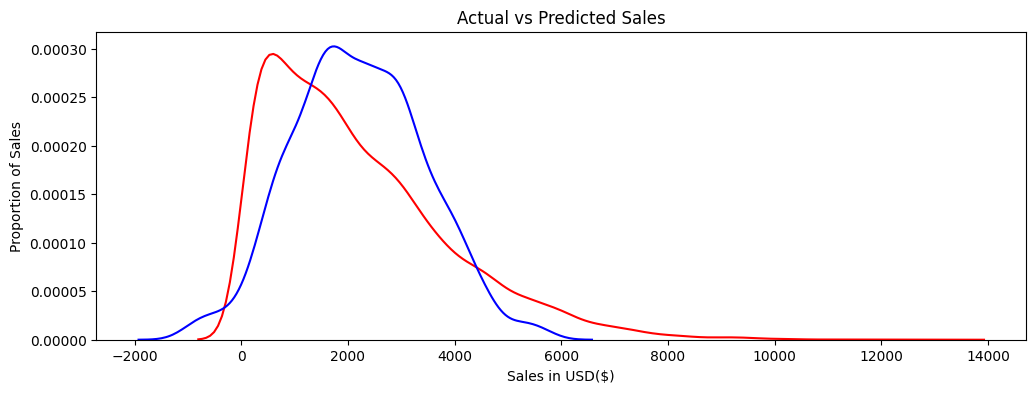

In [55]:
plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(Predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Sales')
plt.xlabel('Sales in USD($)')
plt.ylabel('Proportion of Sales')

plt.show()
plt.close()

### RandomForest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)


In [57]:
rf.fit(X_train_std, y_train)

RandomForestRegressor(n_estimators=1000)

In [58]:
Predictions = rf.predict(X_test_std)

In [59]:
print(r2_score(y_test,Predictions))
print(mean_absolute_error(y_test,Predictions))
print(np.sqrt(mean_squared_error(y_test,Predictions)))

0.57756080523455
741.4385588866861
1071.5302545136858


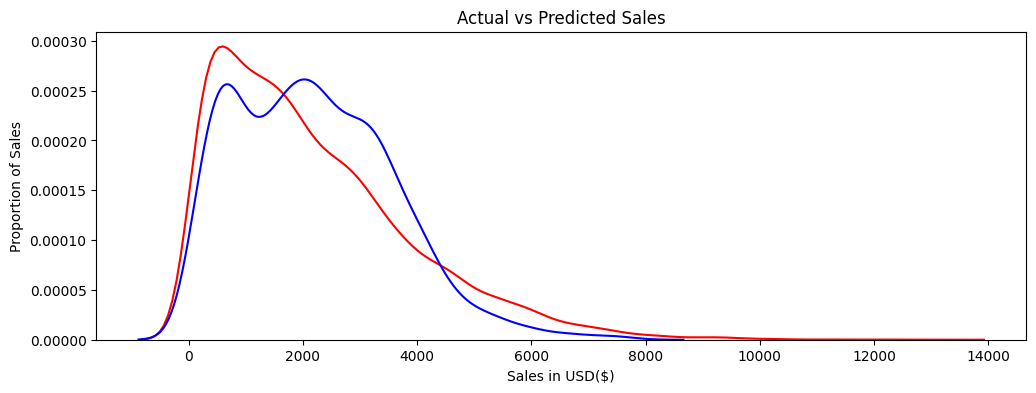

In [60]:
plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(Predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Sales')
plt.xlabel('Sales in USD($)')
plt.ylabel('Proportion of Sales')

plt.show()
plt.close()